In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 
A few things:

-I've downloaded and compiled mocsy on the /data machines at /data/tjarniko/mocsy, so you need to either append that path or redownload it/ recompile it (no reason probably not to use my download)

-Need to use in_situ T, psu. 

-Pretty good docs are here, I didn't read them the first time around, oops http://ocmip5.ipsl.jussieu.fr/mocsy/

-it only takes 1D arrays, so you need to use np.ravel

-The formulation is like this:

    response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                       sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

where I've selected the best optb, optk1k2, optkf options. They're (slightly) different constants in formulations of the carbonate chemistry system. they're pretty similar, esp for your work (probably limited freshwater?)

-silicate and phosphate do affect OmegaA a little bit, but really just a little bit, I wouldn't worry about it. Same with latitude (which again factors into one of the parameterzations)

-atmospheric pressure should be in Patm (i usually say 1 unless I'm calculating it online) 

-depth can be in meters or dbar, I use meters.


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import sys
sys.path.append('/data/kramosmu/mocsy')
import mocsy

# import time
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# from oct2py import octave
import seawater as sw
# from __future__ import print_function
# from numpy import *
# from scipy import *
# import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt
# from matplotlib import reload
# plt.style.use('ggplot')
import netCDF4 as nc
# import numpy as np
# import cmocean as cm

# ""
# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
#     geo_tools,
#     tidetools
# )

%matplotlib inline

In [2]:
DIC = np.arange(1500,2500,100)
TA = np.zeros_like(DIC)
S = np.zeros_like(DIC)
T = np.zeros_like(DIC)
depth = np.zeros_like(DIC)
Surf_p = np.zeros_like(DIC)
zero  = np.zeros_like(DIC)

Surf_p[:] = 1
T[:] = 10
S[:] = 31
TA[:] = 2050

DICumL = DIC*1e-3
TAumL = TA*1e-3

#initialize to standard values. 


In [3]:
response_tup = mocsy.mvars(temp=T, sal=S, alk=TAumL, dic=DICumL, 
                   sil=zero, phos=zero, patm=Surf_p, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup



In [4]:
print(OmegaA)

[5.39744178 4.42647751 3.46433235 2.52086556 1.62073257 0.84641823
 0.38260997 0.20604314 0.13529941 0.0997249 ]


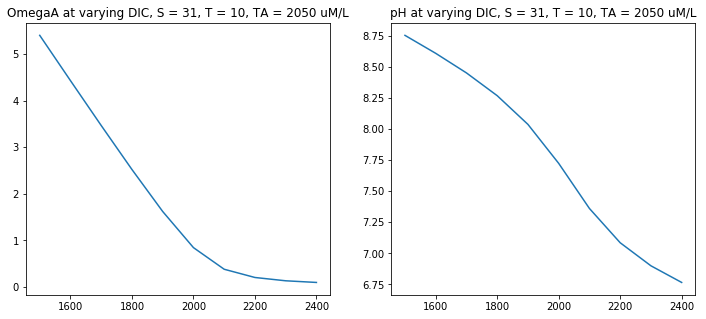

In [5]:
fig = plt.figure(figsize=(12,5))

for i in range(1,3):
    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.plot(DIC,OmegaA)
        ax.set_title('OmegaA at varying DIC, S = 31, T = 10, TA = 2050 uM/L')
        
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.plot(DIC,pH)
        ax.set_title('pH at varying DIC, S = 31, T = 10, TA = 2050 uM/L')